In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-29 20:47:22.550703: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 20:47:22.550804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 20:47:22.552686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Loading data
data = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.shape

(1143, 13)

In [5]:
#Drop Id column
data.drop(columns = "Id", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


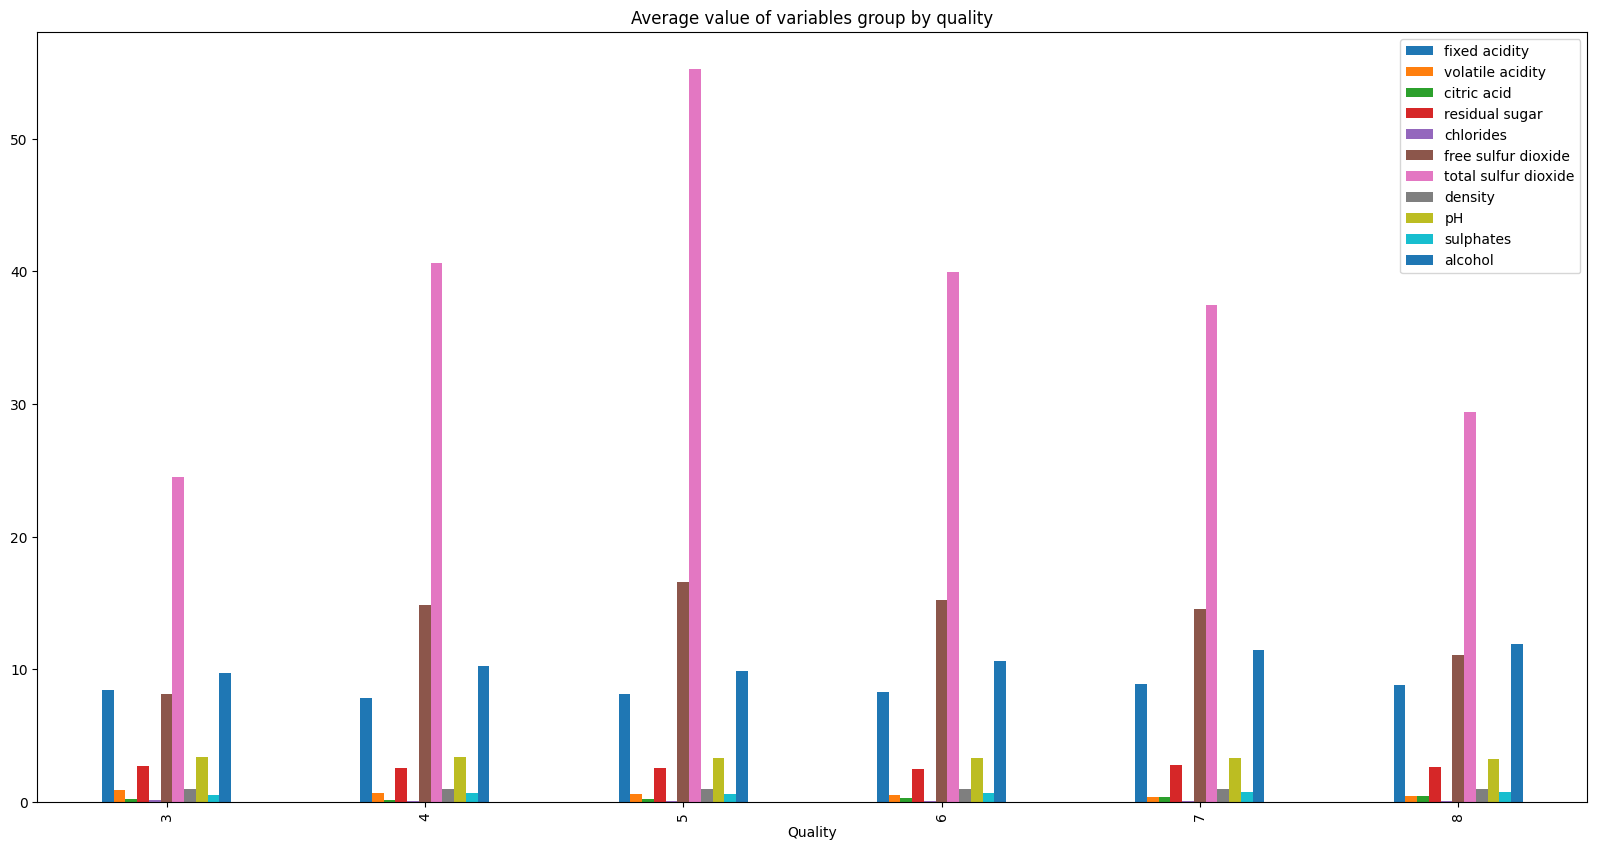

In [6]:
avg_per_quality = data.groupby("quality").mean()
avg_per_quality.plot(kind="bar", figsize=(20,10))
plt.title("Average value of variables group by quality")
plt.xlabel("Quality")
plt.show()

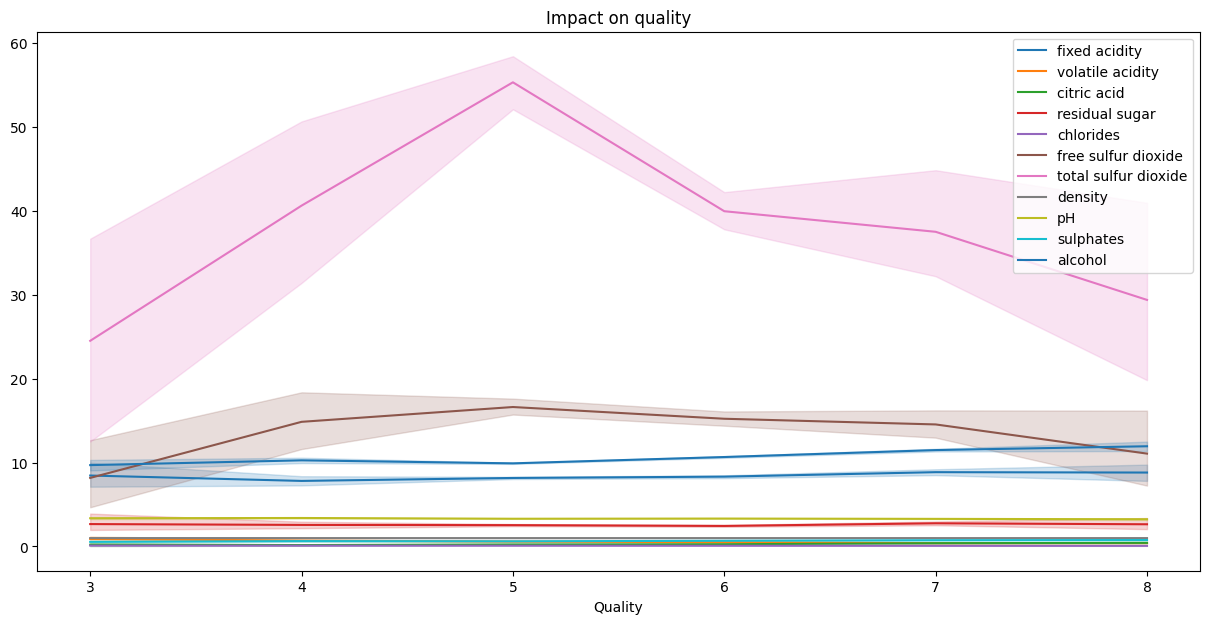

In [7]:
plt.figure(figsize=(15,7))
for col in data.columns:
    if col != "quality":
        sns.lineplot(data=data, x="quality", y=col, label=col)
plt.title("Impact on quality")
plt.xlabel("Quality")
plt.ylabel("")
plt.legend()
plt.show()

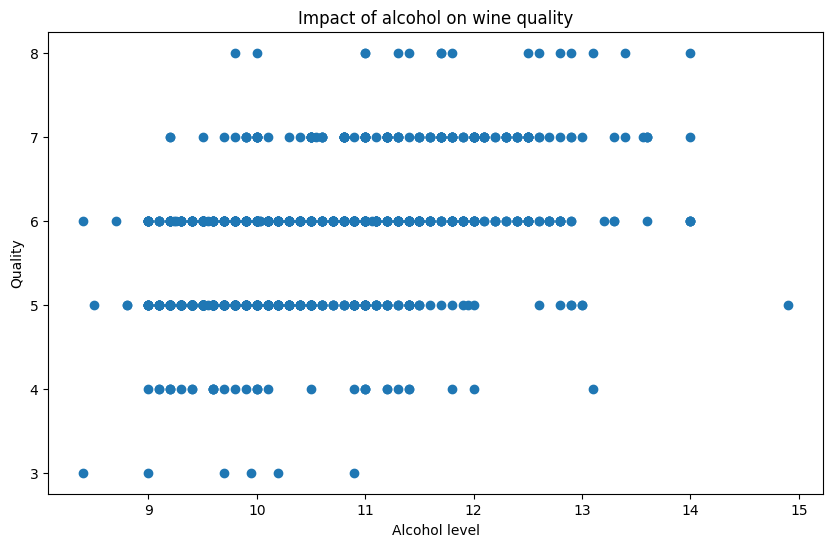

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data["alcohol"], data["quality"])
plt.xlabel("Alcohol level")
plt.ylabel("Quality")
plt.title("Impact of alcohol on wine quality")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression:",accuracy_score(y_test, y_pred))

Logistic Regression: 0.6375545851528385


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

print("Random Forest:",accuracy_score(y_test, y_pred))

Random Forest: 0.7030567685589519


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

one_hot = pd.get_dummies(data['quality'], dtype="int")

model = Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(6, activation="sigmoid")
], name="my_model")

X = data[[col for col in data.columns if col != 'quality']].values
y = one_hot.values

model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            96 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 786 (3.07 KB)

 Trainable params: 786 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.01),
)
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1563
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2230 
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1687
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1648 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1980 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1326 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1440
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1317
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1433
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1572
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1373
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1271
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1121
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1247
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0896
Epoch 16/50
29/

In [15]:
y_pred = model.predict(X_test.reshape(X_test.shape[0],11))
y_final = np.zeros((X_test.shape[0], 6))
for i in range(y_pred.shape[0]):
    max_i = np.argmax(y_pred[i])
    y_final[i][max_i] = 1

print("Neural network:", accuracy_score(y_test, y_final))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Neural network: 0.6375545851528385
